<a href="https://colab.research.google.com/github/SaymaSJ/Porject-IoMT-/blob/main/IoMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries and Dataset**

In [20]:
import os
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,precision_recall_curve,recall_score

In [21]:
import os
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [22]:
df= pd.read_csv("/content/Health(IoMT).csv")
df.head()

,Temperature (),Heart Rate (BPM),Oxygen Saturation (%),Dry Cough,Muscle Pain,Headache,Runny Nose,Outcome
0,98.8,96,96,0,1,0,1,0
1,100.5,97,93,1,0,0,0,1
2,100.6,96,94,1,1,0,0,1
3,99.3,95,95,1,1,1,1,0
4,100.2,97,93,1,0,0,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature ()         1000 non-null   float64
 1   Heart Rate (BPM)       1000 non-null   int64  
 2   Oxygen Saturation (%)  1000 non-null   int64  
 3   Dry Cough              1000 non-null   int64  
 4   Muscle Pain            1000 non-null   int64  
 5   Headache               1000 non-null   int64  
 6   Runny Nose             1000 non-null   int64  
 7   Outcome                1000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


In [24]:
df.dtypes

Temperature ()           float64
Heart Rate (BPM)           int64
Oxygen Saturation (%)      int64
Dry Cough                  int64
Muscle Pain                int64
Headache                   int64
Runny Nose                 int64
Outcome                    int64
dtype: object

In [25]:
string_col=df.select_dtypes("string").columns.to_list()

In [26]:
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("Outcome")

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (),1000.0,100.638,1.507185,98.0,99.2,100.5,101.9,103.9
Heart Rate (BPM),1000.0,99.325,5.084804,4.0,96.0,99.0,101.0,116.0
Oxygen Saturation (%),1000.0,94.089,2.832155,88.0,92.0,95.0,96.0,99.0
Dry Cough,1000.0,0.492,0.500186,0.0,0.0,0.0,1.0,1.0
Muscle Pain,1000.0,0.497,0.500241,0.0,0.0,0.0,1.0,1.0
Headache,1000.0,0.532,0.499225,0.0,0.0,1.0,1.0,1.0
Runny Nose,1000.0,0.490,0.500150,0.0,0.0,0.0,1.0,1.0
Outcome,1000.0,0.657,0.474949,0.0,0.0,1.0,1.0,1.0


In [28]:
px.imshow(df.corr(),title="Correlation Plot of the Viral fever Prediction")

[]

<Figure size 1000x800 with 0 Axes>

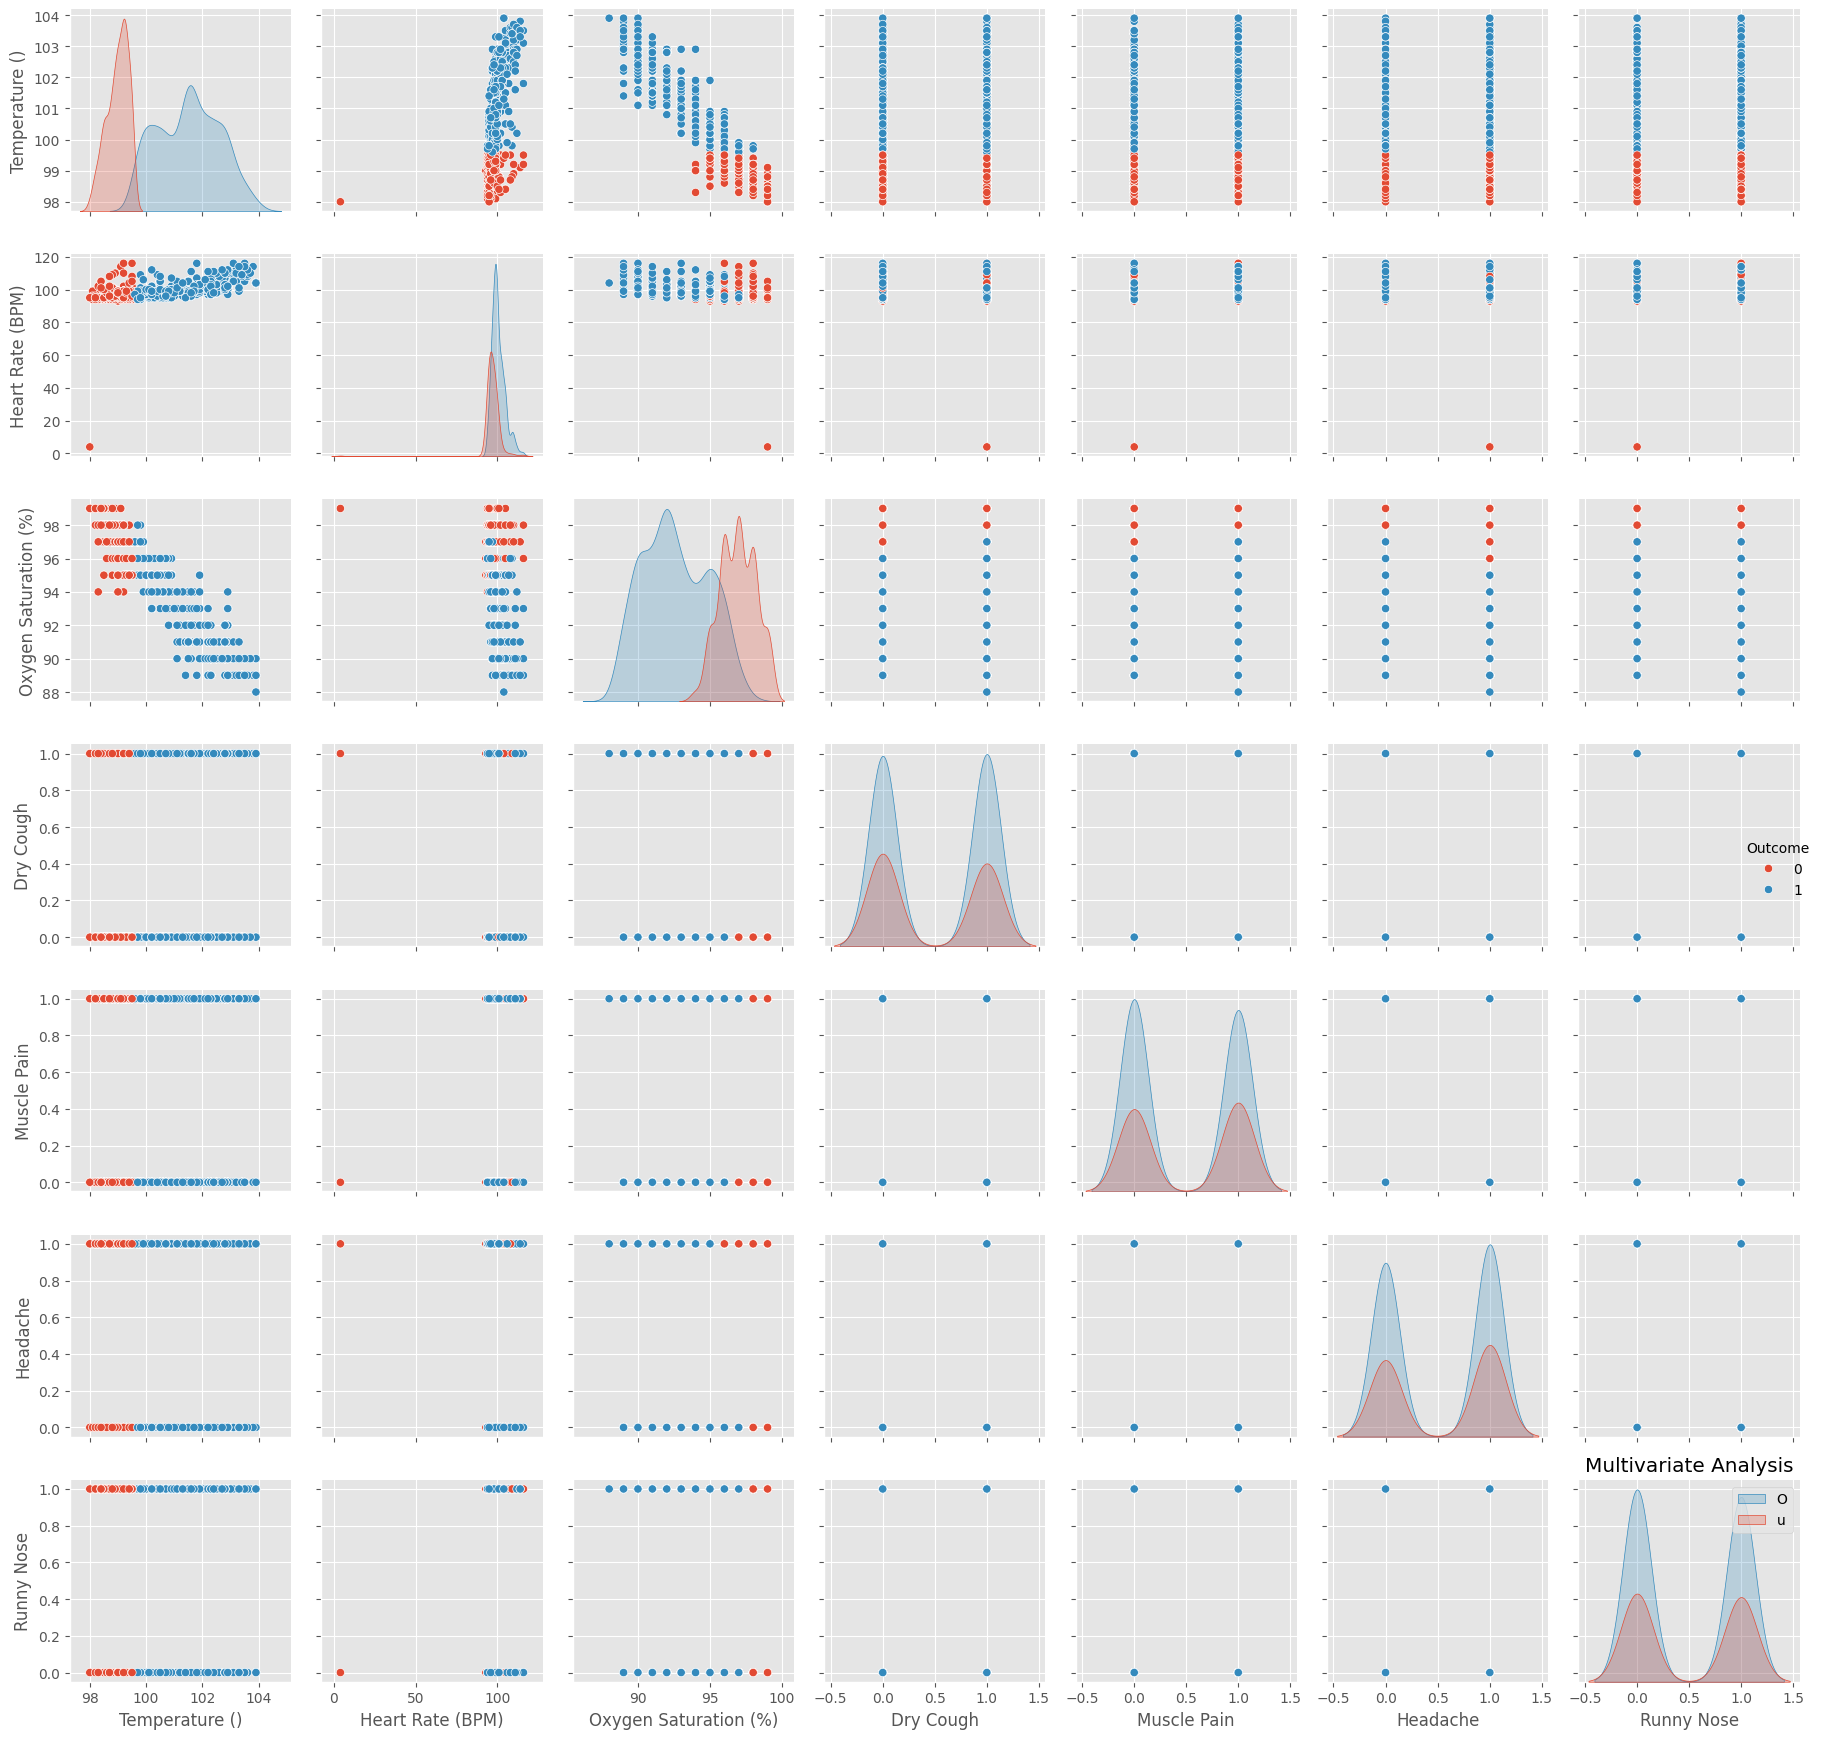

In [29]:
plt.figure(figsize=(10,8))
sns.pairplot(df,hue="Outcome")
plt.title("Multivariate Analysis")
plt.legend("Outcome")
plt.tight_layout()
plt.plot()

**Handling missing values**


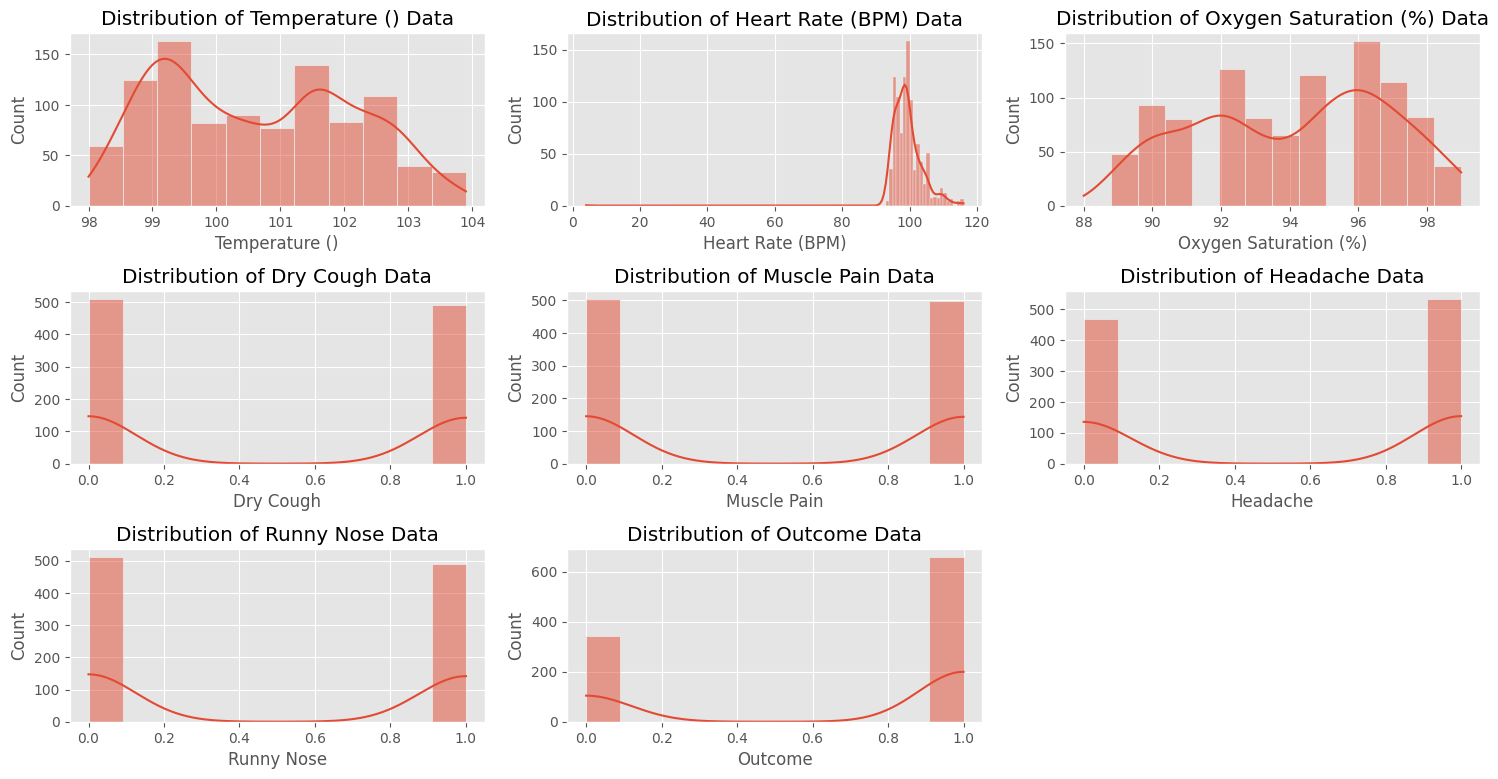

In [30]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [31]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [32]:
import missingno as msno

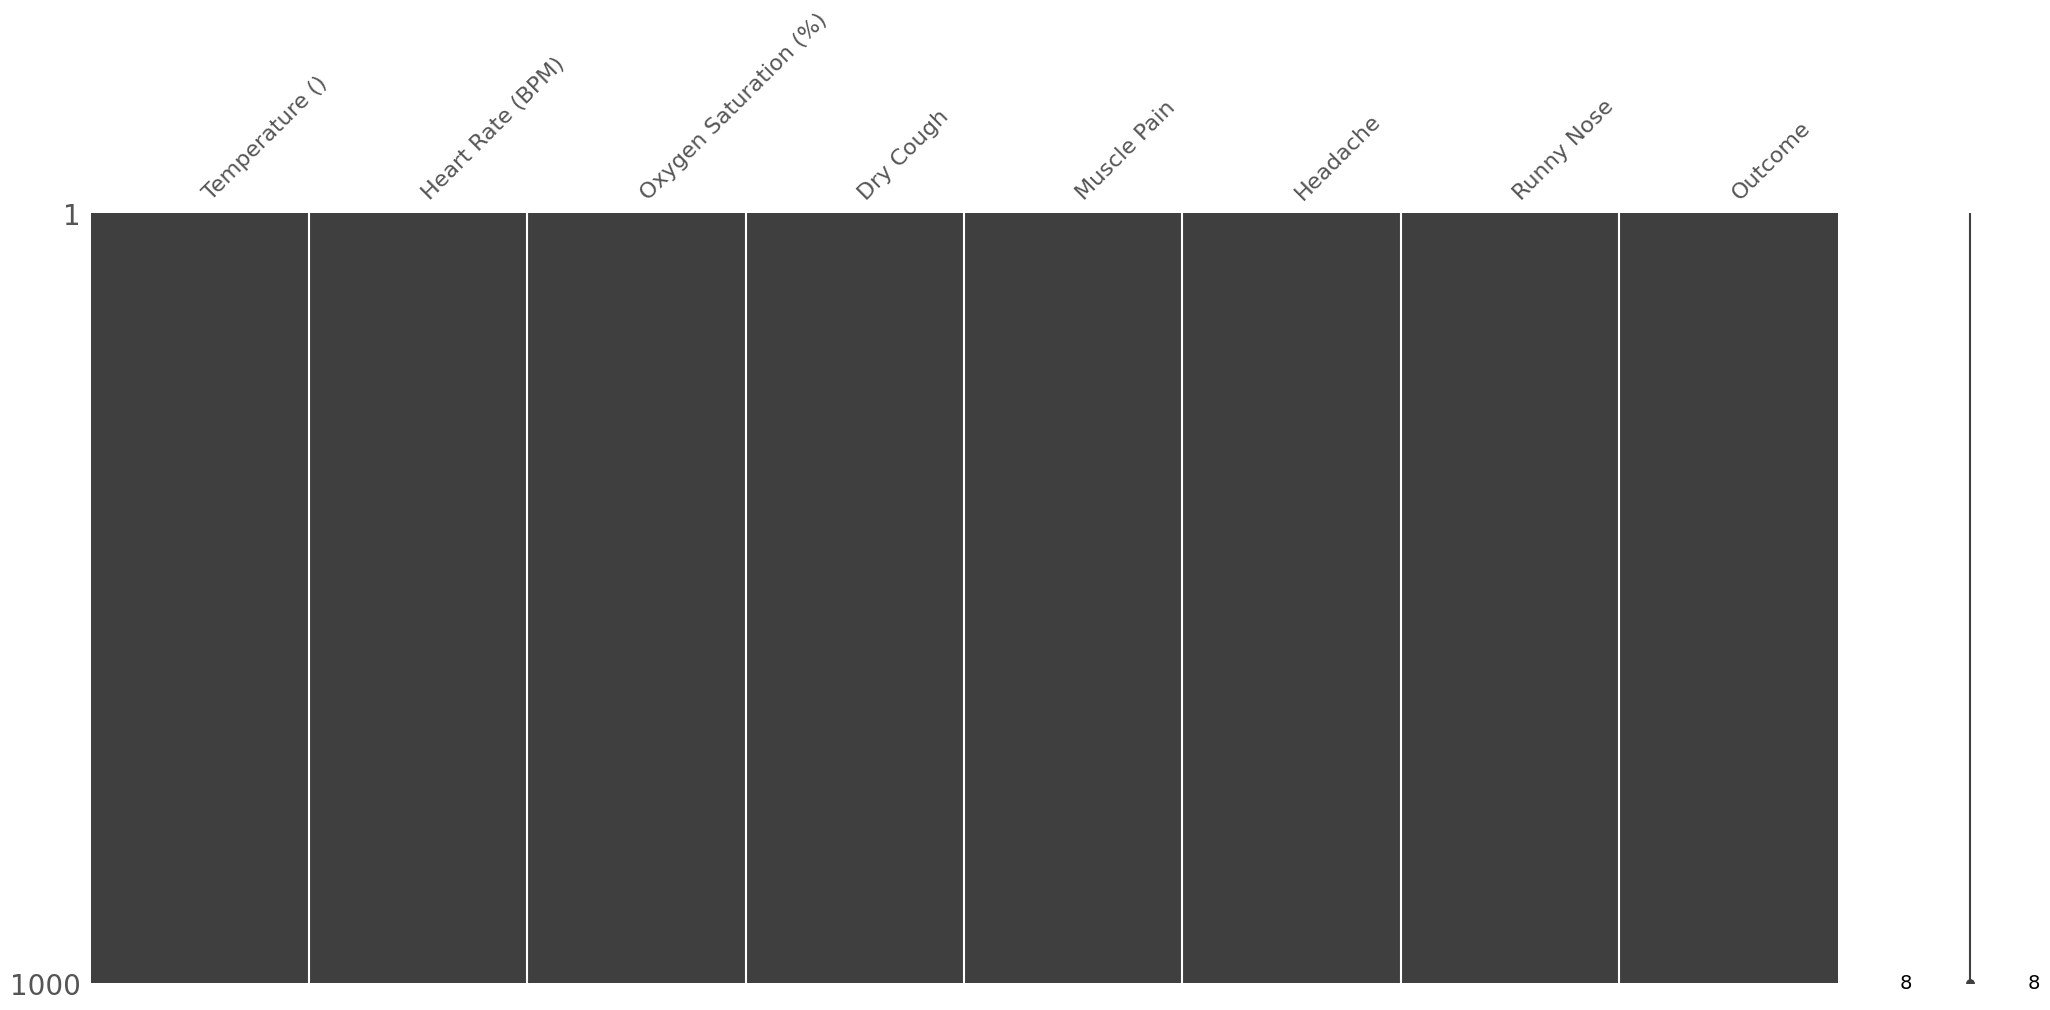

<Figure size 1500x900 with 0 Axes>

In [33]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()


In [34]:
df.isnull().sum()

Temperature ()           0
Heart Rate (BPM)         0
Oxygen Saturation (%)    0
Dry Cough                0
Muscle Pain              0
Headache                 0
Runny Nose               0
Outcome                  0
dtype: int64

In [35]:
fig = px.box(df,y='Temperature ()',x='Outcome',title=f"Distrubution of Temperature")
fig.show()

In [36]:
fig = px.box(df,y='Heart Rate (BPM)',x='Outcome',title=f"Distrubution of RestingBP")
fig.show()

In [37]:
fig = px.box(df,y='Oxygen Saturation (%)',x='Outcome',title=f"Distrubution of RestingBP")
fig.show()

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import seaborn as sb


# Imbalance data(SMOTE)

In [39]:

!pip install py-AutoClean

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.9 MB/s eta 0:00:00
  Created wheel for py-AutoClean: filename=py_AutoClean-1.1.3-py3-none-any.whl size=10273 sha256=625b423d1f0b04a781faa61d3db2860214a91306ca21285e170ed537a1051197
  Stored in directory: /root/.cache/pip/wheels/b5/13/2b/3a5fdae6161f870ea670f2bf3a7157f8a5b38b166282b6bc92
Successfully built py-AutoClean


In [40]:
from AutoClean import AutoClean

In [42]:
df.shape

(1000, 8)

In [43]:
from collections import Counter
!pip install imblearn

In [44]:
print(sorted(Counter(df['Outcome']).items()))

[(0, 343), (1, 657)]


In [45]:
from imblearn.over_sampling import SMOTE


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#creation of instance
scaler.fit(df.drop('Outcome',axis=1))
scaled_features = scaler.transform(df.drop('Outcome',axis=1))

In [47]:
X = scaled_features
y = df['Outcome']

In [48]:
print(f'X:{X.shape}')
print(f'y:{y.shape}')

X:(1000, 7)
y:(1000,)


Counter({1: 657, 0: 343})


<Axes: ylabel='count'>

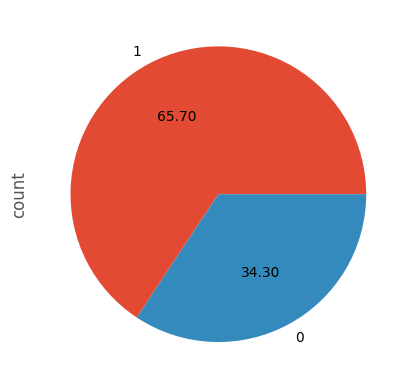

In [49]:
y.value_counts()
counter = Counter(y)
print(counter)
y.value_counts().plot.pie(autopct='%.2f')

[(0, 657), (1, 657)] (1314,)


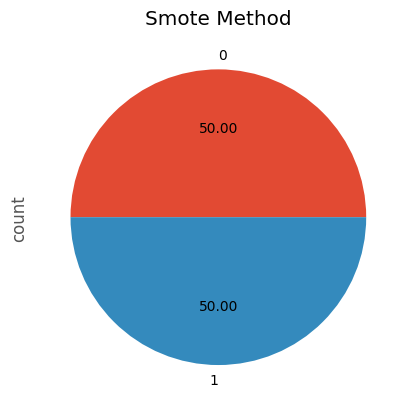

In [50]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
X_res, y_res = sm.fit_resample(X,y)
ax= y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("Smote Method")
print(sorted(Counter(y_res).items()),y_res.shape)

In [51]:
#  y_res.value_counts().plot(kind = 'bar', color = ['blue', 'red'])

In [177]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 6))
# plt.scatter(X_res[y_res == 0][:, 0], X_res[y_res == 0][:, 1], label='Outcome 0 (Synthetic)', alpha=0.5)
# plt.scatter(X_res[y_res == 1][:, 0], X_res[y_res == 1][:, 1], label='Outcome 1 (Synthetic)', alpha=0.5)
# plt.xlabel('Standardized Feature 1')
# plt.ylabel('Standardized Feature 2')
# plt.title('Scatter Plot after SMOTE (with Standardization)')
# plt.legend()
# plt.show()
# from matplotlib import pyplot
# from numpy import where
# for label, _ in counter.items():
# row_ix = where(y == label)[0]
# plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
# plt.legend()
# plot_params.show()

In [52]:
print(f"X_res shape: {X_res.shape}")
print(f"y_res shape: {y_res.shape}")

X_res shape: (1314, 7)
y_res shape: (1314,)


# Train-test data

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, stratify=y_res, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(1000, 7) (985, 7) (329, 7)


In [54]:
import numpy as np

from collections import Counter



# Calculate class distribution
class_distribution = Counter(y_res)

# Calculate class imbalance
total_samples = len(y_res)
class_imbalance = {class_label: count / total_samples for class_label, count in class_distribution.items()}

print("Class Distribution:")
print(class_distribution)
print("\nClass Imbalance:")
print(class_imbalance)

Class Distribution:
Counter({0: 657, 1: 657})

Class Imbalance:
{0: 0.5, 1: 0.5}


In [208]:
# from sklearn.model_selection import train_test_split
# from sklearn.utils import resample

# # Upsample the minority class to match the majority class
# X_resampled, y_resampled = resample(X[y==1], y[y==1], replace=True, n_samples=X[y==0].shape[0], random_state=42)

# # Concatenate the upsampled minority class with the majority class
# X_balanced = np.vstack((X[y==0], X_resampled))
# y_balanced = np.hstack((y[y==0], y_resampled))

# # Split the balanced dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.25, stratify=y_balanced, random_state=42)

# print(X.shape, X_train.shape, X_test.shape)


(1000, 7) (514, 7) (172, 7)


In [55]:
import numpy as np

from collections import Counter



# Calculate class distribution
class_distribution = Counter(y_res)

# Calculate class imbalance
total_samples = len(y_res)
class_imbalance = {class_label: count / total_samples for class_label, count in class_distribution.items()}

print("Class Distribution:")
print(class_distribution)
print("\nClass Imbalance:")
print(class_imbalance)

Class Distribution:
Counter({0: 657, 1: 657})

Class Imbalance:
{0: 0.5, 1: 0.5}


Testing

# Logistic Regression

In [56]:
from sklearn.metrics import confusion_matrix , classification_report


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


In [65]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()


# forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

# clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

# clf.fit(X_train, y_train)

# print(clf.best_params_)

# print(clf.best_score_)


# Create a pipeline with scaler and logistic regression
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='saga', tol=0.1))

# Create a parameter grid
param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100],
#     'logisticregression__penalty': ['l1', 'l2']
# }
  }
# # Create GridSearchCV object
# lr = GridSearchCV(pipe, param_grid, cv=5,return_train_score=False,scoring='f1_micro' )
lr = GridSearchCV(pipe, param_grid, cv=5,return_train_score=False,scoring='accuracy' )

# Fit the model
# grid_search.fit(X, y)
lr.fit(X_train, y_train)
#  return_train_score=False,scoring='f1_macro')

# Print best parameters and best score
print("Best Parameters:", lr.best_params_)
print("Best Score:", lr.best_score_)


lr.cv_results_
# Predictions on the test set
y_pred = lr.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
print("F1 Score:", f1)

Best Parameters: {'logisticregression__C': 10}
Best Score: 0.9543147208121827
Accuracy: 0.9270516717325228
Precision: 0.9270516717325228
Recall: 0.9270516717325228
F1 Score: 0.9270516717325228


In [66]:
data = pd.DataFrame(lr.cv_results_)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004722,0.000316,0.001588,0.000036,0.1,{'logisticregression__C': 0.1},0.939086,0.949239,0.939086,0.939086,0.934010,0.940102,0.004974,4
1,0.004518,0.000249,0.001618,0.000117,1,{'logisticregression__C': 1},0.944162,0.964467,0.949239,0.954315,0.949239,0.952284,0.006886,3
2,0.005991,0.002316,0.001720,0.000217,10,{'logisticregression__C': 10},0.944162,0.964467,0.949239,0.964467,0.949239,0.954315,0.008494,1
3,0.004695,0.000170,0.001609,0.000074,100,{'logisticregression__C': 100},0.944162,0.959391,0.949239,0.964467,0.944162,0.952284,0.008248,2


In [67]:
# Assign algorithm
lr=LogisticRegression(max_iter=1000, solver='saga', tol=0.1,C=10)





# Link algorithm to X and y variables
lr.fit(X_train, y_train)

# Run algorithm on test data to make predictions
y_pred = lr.predict(X_test)

# Evaluate predictions
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
lr.score=(X_test,y_test)
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

[[165   0]
 [ 28 136]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       165
           1       1.00      0.83      0.91       164

    accuracy                           0.91       329
   macro avg       0.93      0.91      0.91       329
weighted avg       0.93      0.91      0.91       329

Accuracy: 0.9148936170212766
Precision: 1.0
Recall: 0.8292682926829268
F1-Score: 0.9066666666666667


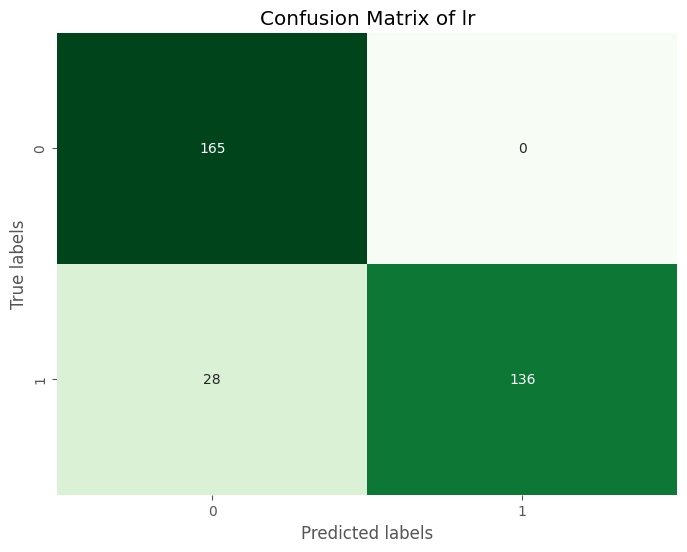

In [68]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of lr')
plt.show()

In [69]:
cm = confusion_matrix(y_test, y_pred)

# Calculate the validation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
informedness = recall + specificity - 1
markedness = ppv + npv - 1

# Print the metrics
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Informedness (Youden's J statistic):", informedness)
print("Markedness:", markedness)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of lr')
plt.show()



Confusion Matrix:
[[165   0]
 [ 28 136]]
Accuracy: 0.9148936170212766
Precision: 0.9272406570389152
Recall: 0.9148936170212766
F1 Score: 0.9142501683901898
Specificity: 1.0
False Positive Rate (FPR): 0.0
False Negative Rate (FNR): 0.17073170731707318
Positive Predictive Value (PPV): 1.0
Negative Predictive Value (NPV): 0.8549222797927462
Matthews Correlation Coefficient (MCC): 0.8419975886784511
Informedness (Youden's J statistic): 0.9148936170212765
Markedness: 0.854922279792746


NameError: name 'y_pred_threshold' is not defined

# incase

Confusion Matrix:
[[161   4]
 [ 14 150]]
Accuracy: 0.9452887537993921
Confusion Matrix:
[[161   4]
 [ 14 150]]
Accuracy: 0.9452887537993921
Precision: 0.9469308806694826
Recall: 0.9452887537993921
F1 Score: 0.9452330912292657
Specificity: 0.9757575757575757
False Positive Rate (FPR): 0.024242424242424242
False Negative Rate (FNR): 0.08536585365853659
Positive Predictive Value (PPV): 0.974025974025974
Negative Predictive Value (NPV): 0.92
Matthews Correlation Coefficient (MCC): 0.8922069976268163
Informedness (Youden's J statistic): 0.921046329556968
Markedness: 0.8940259740259742


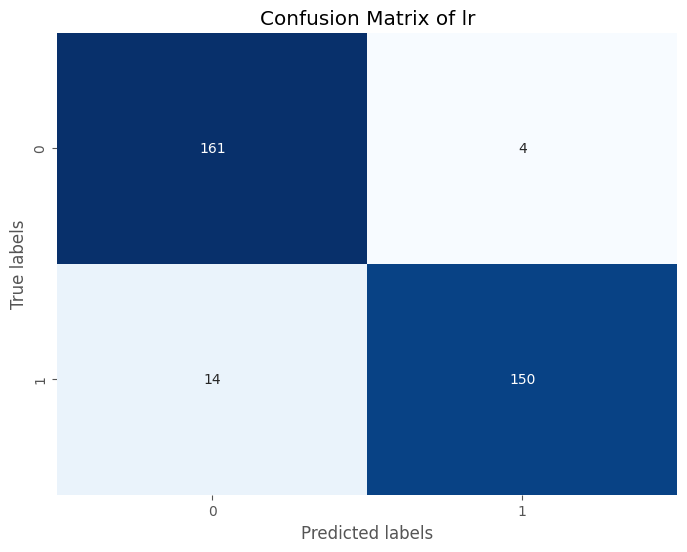

In [76]:


# Assuming you have a trained logistic regression model named 'logistic_regression'
# and your test features are in 'X_test'

# Get predicted probabilities for each class
y_proba = lr.predict_proba(X_test)

# Extract the probabilities for the positive class (assuming it's class 1)
y_proba_positive = y_proba[:, 1]

# Assuming you have true labels y_true

# Define a threshold
threshold = 0.3
  # Example threshold, you can adjust as needed

# Convert predicted probabilities to binary predictions based on the threshold
y_pred_threshold = (y_proba_positive >= threshold).astype(int)

# Now you can compute the confusion matrix, accuracy, or other metrics using y_true and y_pred_threshold
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_threshold)
print("Confusion Matrix:")
print(conf_mat)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_threshold)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred_threshold)

# Calculate the validation metrics
accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold, average='weighted')
recall = recall_score(y_test, y_pred_threshold, average='weighted')
f1 = f1_score(y_test, y_pred_threshold, average='weighted')

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
informedness = recall + specificity - 1
markedness = ppv + npv - 1

# Print the metrics
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Informedness (Youden's J statistic):", informedness)
print("Markedness:", markedness)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of lr')
plt.show()


# **Cross validation of LR**

In [77]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000, solver='saga', tol=0.1,C=10), X, y, cv=10)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.93 0.95 0.95 0.92 0.93 0.88 0.98 0.98 0.92 0.95]
93.9


In [42]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score



# # Define the model
# model = LogisticRegression()

# # Define the parameter grid
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
#     'solver': ['liblinear', 'saga'],       # Solver for optimization problem
#     'penalty': ['l1', 'l2'],               # Penalty (L1 or L2 regularization)
# }

# # Define scoring metrics
# scoring = {
#     'f1_score': make_scorer(f1_score),
#     'accuracy': make_scorer(accuracy_score),
#     'recall': make_scorer(recall_score)
# }

# # Perform grid search
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit='f1_score')
# grid_search.fit(X_res, y_res)

# # Get the best parameters and scores
# print("Best parameters found:", grid_search.best_params_)
# print("Best F1 score:", grid_search.best_score_)
# print("Best accuracy:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
# print("Best recall:", grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])

# SVM

In [78]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

In [77]:
# from sklearn.model_selection import GridSearchCV

# svm = GridSearchCV(SVC(gamma='auto'), {'kernel': ['linear','rbf'], 'C': [0.1, 10, ],
#                                        }, cv=5, return_train_score=False,scoring='f1_macro')
# svm.fit(X_train, y_train)
# svm.cv_results_

# # Print best parameters and best score
# print("Best Parameters:", svm.best_params_)
# print("Best Score:", svm.best_score_)


# svm.cv_results_
# # Predictions on the test set
# y_pred = svm.predict(X_test)

# # Accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Precision
# precision = precision_score(y_test, y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
# print("Precision:", precision)

# # Recall
# recall = recall_score(y_test, y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
# print("Recall:", recall)

# # F1 Score
# f1 = f1_score(y_test, y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
print("F1 Score:", f1)

Best Parameters: {'C': 10, 'kernel': 'linear'}
Best Score: 0.9985347985347985
Accuracy: 0.996
Precision: 0.996
Recall: 0.996
F1 Score: 0.996


In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a pipeline with scaler and Support Vector Machine
svm = make_pipeline(StandardScaler(), SVC(max_iter=1000, tol=0.1))

# Create a parameter grid
svm_param_grid = {
    'svc__C': [0.001,
0.01, 0.05,
0.1,

],
    'svc__kernel': ['linear']
}

# Create GridSearchCV object
svm = GridSearchCV(svm, svm_param_grid, cv=10
                   , return_train_score=False, scoring='accuracy')

# Fit the model
svm.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", svm.best_params_)
print("Best Score:", svm.best_score_)

# Predictions on the test set
svm_y_pred = svm.predict(X_test)

# Accuracy
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("Accuracy:", svm_accuracy)

# Precision
svm_precision = precision_score(y_test, svm_y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
print("Precision:", svm_precision)

# Recall
svm_recall = recall_score(y_test, svm_y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
print("Recall:", svm_recall)

# F1 Score
svm_f1 = f1_score(y_test, svm_y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
print("F1 Score:", svm_f1)


Best Parameters: {'svc__C': 0.1, 'svc__kernel': 'linear'}
Best Score: 0.9609883198562443
Accuracy: 0.9665653495440729
Precision: 0.9665653495440729
Recall: 0.9665653495440729
F1 Score: 0.9665653495440729


In [132]:
data = pd.DataFrame(svm.cv_results_)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.059114,0.016583,0.010479,0.005956,0.001,linear,"{'svc__C': 0.001, 'svc__kernel': 'linear'}",0.830189,0.866667,0.914286,0.857143,0.866667,0.866667,0.866667,0.828571,0.819048,0.876190,0.859209,0.026348,4
1,0.029856,0.007543,0.005061,0.002463,0.01,linear,"{'svc__C': 0.01, 'svc__kernel': 'linear'}",0.896226,0.933333,0.952381,0.942857,0.952381,0.971429,0.952381,0.885714,0.895238,0.914286,0.929623,0.028198,3
2,0.025659,0.009272,0.004141,0.002254,0.05,linear,"{'svc__C': 0.05, 'svc__kernel': 'linear'}",0.952830,0.961905,0.952381,0.971429,0.971429,0.980952,0.961905,0.942857,0.904762,0.952381,0.955283,0.019994,2
3,0.020286,0.004668,0.004666,0.002371,0.1,linear,"{'svc__C': 0.1, 'svc__kernel': 'linear'}",0.962264,0.980952,0.961905,0.971429,0.971429,0.980952,0.961905,0.942857,0.923810,0.952381,0.960988,0.016744,1


In [183]:
# Assign algorithm
svm=SVC(max_iter=1000,  tol=0.1,C=.001, kernel='linear',probability=True)





# Link algorithm to X and y variables
svm.fit(X_train, y_train)

# Run algorithm on test data to make predictions
y_pred = svm.predict(X_test)

# Evaluate predictions
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
svm.score=(X_test,y_test)
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

[[165   0]
 [ 43 121]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       165
           1       1.00      0.74      0.85       164

    accuracy                           0.87       329
   macro avg       0.90      0.87      0.87       329
weighted avg       0.90      0.87      0.87       329

Accuracy: 0.8693009118541033
Precision: 1.0
Recall: 0.7378048780487805
F1-Score: 0.8491228070175438


Confusion Matrix:
[[165   0]
 [ 20 144]]
Accuracy: 0.939209726443769
Precision: 1.0
Recall: 0.8780487804878049
F1 Score: 0.9350649350649352
False Positive Rate (FPR): 0.0


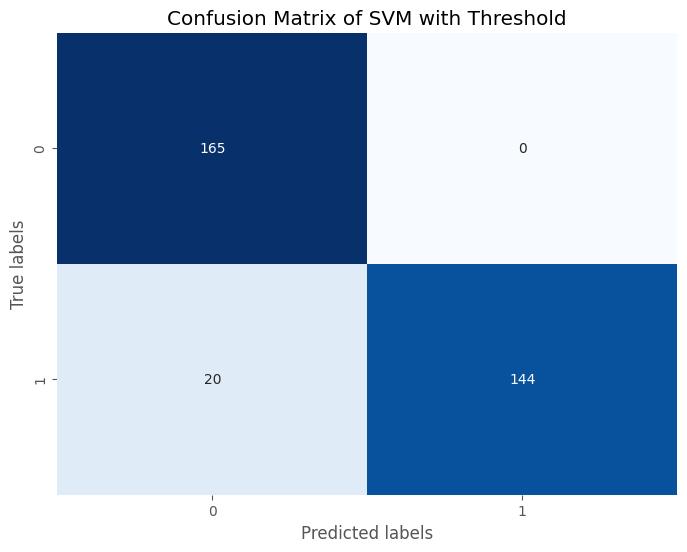

In [240]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assign algorithm
svm = SVC(max_iter=1000, tol=0.1, C=0.1, kernel='linear', probability=True)

# Train algorithm on training data
svm.fit(X_train, y_train)

# Obtain decision scores for test instances
decision_scores = svm.decision_function(X_test)

# Adjust the decision threshold (increase false positive rate)
threshold = 0.3

  # Adjust this threshold as needed
y_pred_threshold = (decision_scores >= threshold).astype(int)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_threshold)

# Compute additional metrics
accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)
fpr = conf_mat[0, 1] / (conf_mat[0, 0] + conf_mat[0, 1])  # False positive rate

# Print metrics
print("Confusion Matrix:")
print(conf_mat)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("False Positive Rate (FPR):", fpr)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of SVM with Threshold')
plt.show()



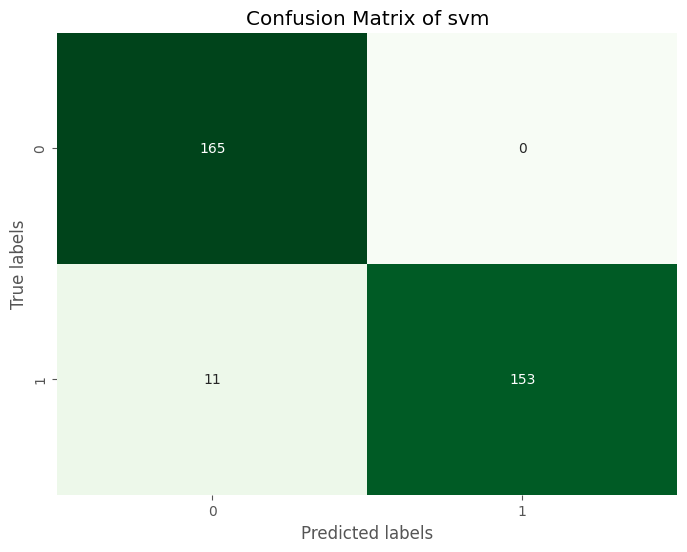

In [145]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of svm')
plt.show()

In [129]:
cv_score_svm = cross_val_score(SVC(kernel='linear',gamma="auto", probability=True,C=.1), X, y, cv=10)

print(cv_score_svm)

mean_accuracy_svm = sum(cv_score_svm)/len(cv_score_svm)

mean_accuracy_svm = mean_accuracy_svm*100

mean_accuracy_svm = round(mean_accuracy_svm, 2)

print(mean_accuracy_svm)

[0.97 1.   1.   0.93 0.99 0.94 1.   0.97 0.95 0.94]
96.9


# test

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train an SVM model
svm = SVC(C=.56, kernel='linear')  # Adjust parameters as needed
svm.fit(X_train, y_train)

# Predictions on training set
train_pred = svm.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Predictions on validation set
val_pred = svm.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Compare training and validation accuracies
if train_accuracy > val_accuracy:
    print("Model is likely overfitting")
elif train_accuracy < val_accuracy:
    print("Model is likely underfitting")
else:
    print("Model is performing similarly on both training and validation sets")



Training Accuracy: 0.9980970504281637
Validation Accuracy: 1.0
Model is likely underfitting


In [128]:
from sklearn.model_selection import RandomizedSearchCV
svm = SVC()
# Define the hyperparameter search space
param_dist = {'C':[0.001,
0.01, 0.05,
0.1,

] }  # Search space for C, e.g., from 0.001 to 1000

# Define the random search
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Perform random search
random_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)





Best Parameters:  {'C': 0.1}
Best Score:  0.933


# Confusion matrix

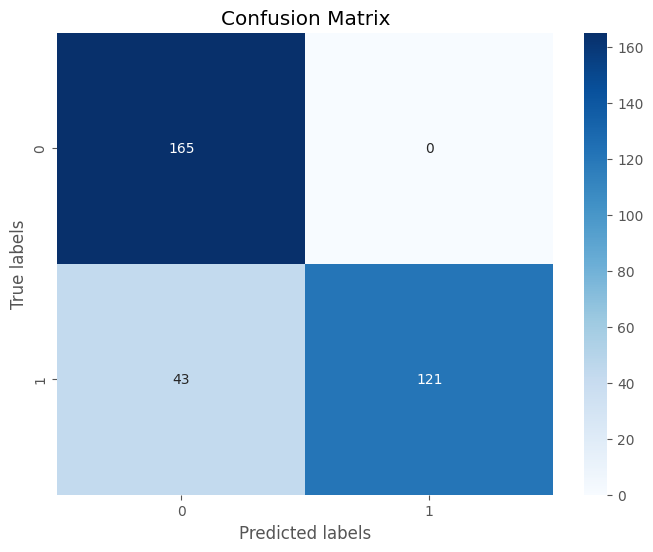

In [241]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have true labels y_true and predicted labels y_pred
conf_mat = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix:
[[165   0]
 [ 20 144]]
Confusion Matrix:
[[165   0]
 [ 20 144]]
Accuracy: 0.939209726443769
Confusion Matrix:
[[165   0]
 [ 20 144]]
Accuracy: 0.939209726443769
Precision: 0.939209726443769
Recall: 0.939209726443769
F1 Score: 0.939209726443769
Specificity: 1.0
False Positive Rate (FPR): 0.0
False Negative Rate (FNR): 0.12195121951219512
Positive Predictive Value (PPV): 1.0
Negative Predictive Value (NPV): 0.8918918918918919
Matthews Correlation Coefficient (MCC): 0.8849432682396295
Informedness (Youden's J statistic): 0.9392097264437691
Markedness: 0.8918918918918919


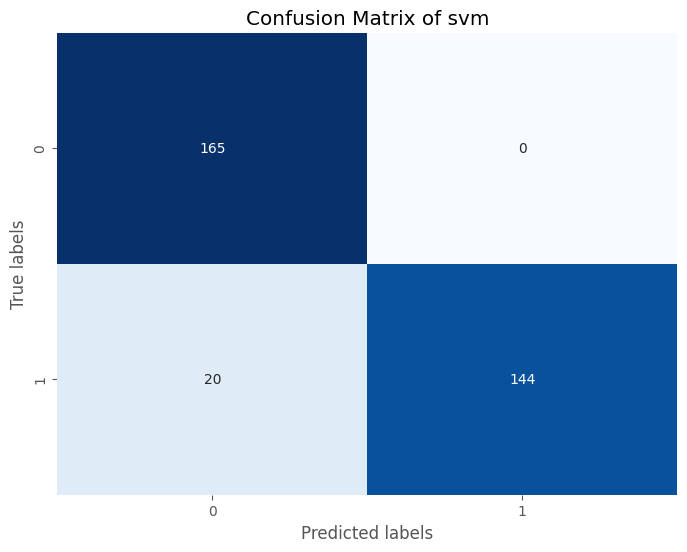

In [242]:


## Obtain decision scores for test instances
decision_scores = svm.decision_function(X_test)

# Adjust the decision threshold (increase false positive rate)
threshold = 0.3  # Adjust this threshold as needed
y_pred_threshold1 = (decision_scores >= threshold).astype(int)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_threshold1)
print("Confusion Matrix:")
print(conf_mat)

# Now you can compute the confusion matrix, accuracy, or other metrics using y_true and y_pred_threshold
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_threshold1)
print("Confusion Matrix:")
print(conf_mat)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_threshold1)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred_threshold1)

# Calculate the validation metrics
accuracy = accuracy_score(y_test, y_pred_threshold1)
precision = precision_score(y_test, y_pred_threshold1, average='micro')
recall = recall_score(y_test, y_pred_threshold1, average='micro')
f1 = f1_score(y_test, y_pred_threshold1, average='micro')

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
informedness = recall + specificity - 1
markedness = ppv + npv - 1

# Print the metrics
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Informedness (Youden's J statistic):", informedness)
print("Markedness:", markedness)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold1)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of svm')
plt.show()


# KNN

**KNN crossvalidation**

In [243]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [ ]:
cv_score_knn = cross_val_score( KNeighborsClassifier(n_neighbors=5), X, y, cv=10)

print(cv_score_knn)

mean_accuracy_knn = sum(cv_score_knn)/len(cv_score_knn)

mean_accuracy_knn = mean_accuracy_knn*100

mean_accuracy_knn = round(mean_accuracy_knn, 2)

print(mean_accuracy_knn)

# Ensamble method

In [53]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier()  # Base classifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=50)  # Bagging classifier

# Train the bagging classifier
bagging_classifier.fit(X_train, y_train)

# Evaluate the bagging classifier
bagging_accuracy = bagging_classifier.score(X_test, y_test)
print(bagging_accuracy)


1.0


In [55]:
from sklearn.ensemble import AdaBoostClassifier

base_classifier = DecisionTreeClassifier(max_depth=1)  # Base classifier
boosting_classifier = AdaBoostClassifier(base_classifier, n_estimators=10)  # Boosting classifier

# Train the boosting classifier
boosting_classifier.fit(X_train, y_train)

# Evaluate the boosting classifier
boosting_accuracy = boosting_classifier.score(X_test, y_test)
print(boosting_accuracy)


1.0


# RF(Classification)

In [ ]:
cv_score_rf = cross_val_score( RandomForestClassifier(n_estimators=2,
    ), X, y, cv=5)

print(cv_score_rf)

mean_accuracy_rf = sum(cv_score_rf)/len(cv_score_rf)

mean_accuracy_rf = mean_accuracy_rf*100

mean_accuracy_rf = round(mean_accuracy_rf, 2)

print(mean_accuracy_rf)

# DT(Classification)

In [ ]:
cv_score_dt = cross_val_score(DecisionTreeClassifier(max_depth=2,criterion='entropy',min_samples_split=10,min_samples_leaf=10,max_features=3), X, y, cv=10)

print(cv_score_dt)

mean_accuracy_dt = sum(cv_score_dt)/len(cv_score_dt)

mean_accuracy_dt = mean_accuracy_dt*100

mean_accuracy_dt = round(mean_accuracy_dt, 2)

print(mean_accuracy_dt)